In [479]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [480]:
# datamodeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# model selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# oversampling and undersampling
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import TomekLinks, NeighbourhoodCleaningRule

In [481]:
import warnings

warnings.filterwarnings("ignore")

# EDA

In [482]:
data = pd.read_excel("/home/slava/Загрузки/WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

In [483]:
df = data.copy()

In [484]:
df.shape

(1470, 35)

In [485]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [486]:
# type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [487]:
# overview of numeric variables
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [488]:
# the number of unique values in each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [489]:
# deleting columns with nunicue=1 and EmployeeNumber
df = df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], 1)

In [490]:
# counting missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

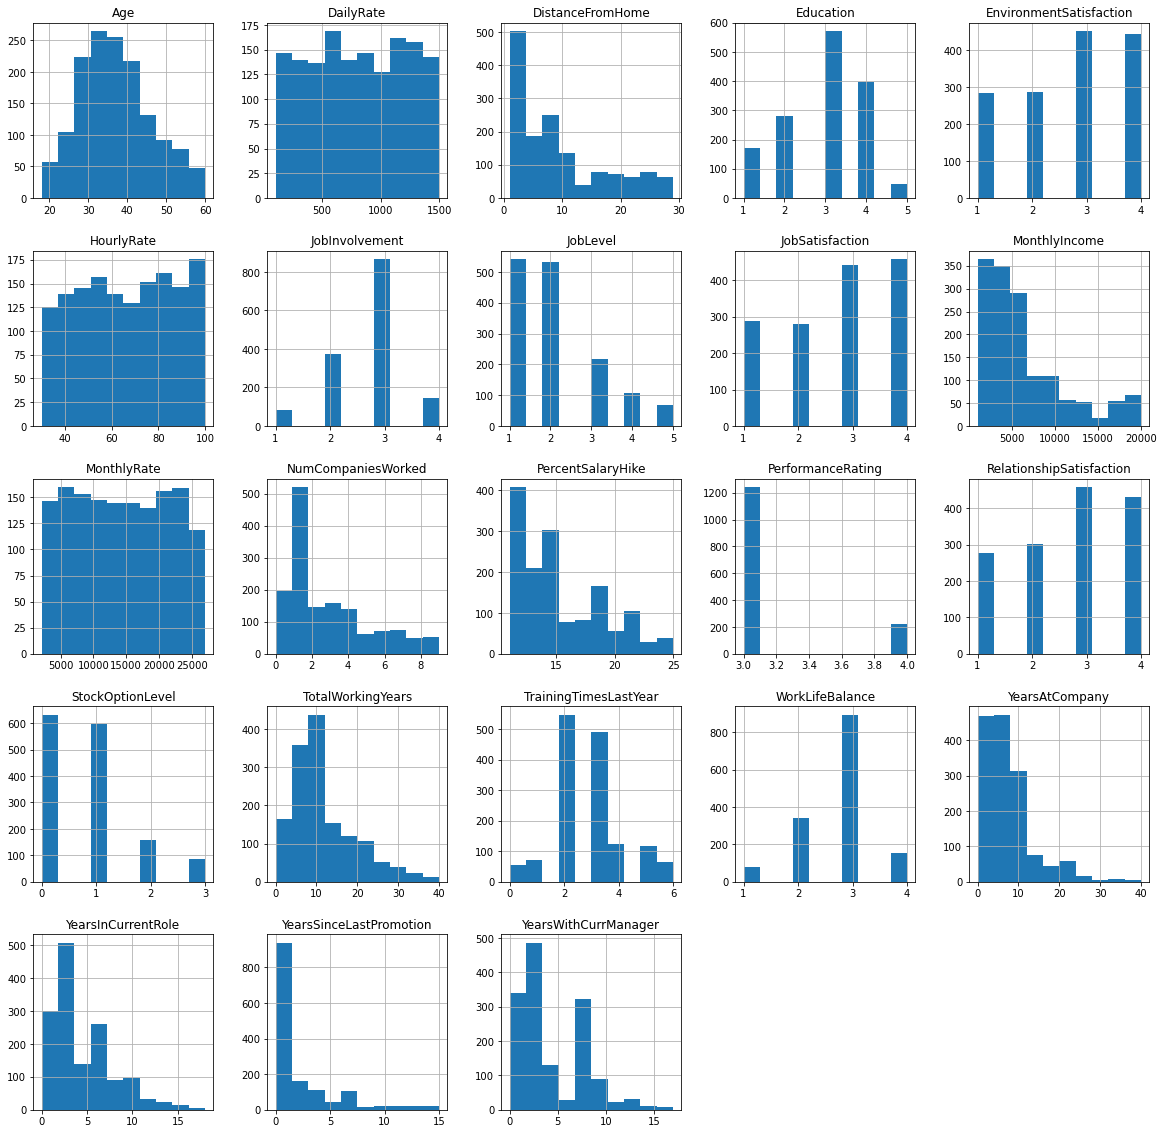

In [491]:
# distribution of some variables
df.hist(figsize=(20, 20))
plt.show()

In [492]:
# function of adding percentages on top of bars
def add_percentages(ax, df=df):
    total = len(df)
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / total:.1f}%\n"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="center", fontsize=12)
    plt.tight_layout()

In [493]:
# function of adding percentages on top of bars with a separator hue
def add_percentages_hue(ax):
    patch = ax.patches
    half = int(len(patch) / 2)
    for i in range(half):
        pat_1 = patch[i]
        pat_2 = patch[i + half]
        height_1 = pat_1.get_height()
        height_2 = pat_2.get_height()
        total = height_1 + height_2
        width_1 = pat_1.get_x() + pat_1.get_width() / 2
        width_2 = pat_2.get_x() + pat_2.get_width() / 2
        ax.text(
            width_1,
            height_1 + 3,
            "{:.1%}".format(height_1 / total),
            ha="center",
            fontsize=12,
        )
        ax.text(
            width_2,
            height_2 + 3,
            "{:.1%}".format(height_2 / total),
            ha="center",
            fontsize=12,
        )

## Target

Целевой переменной является показатель усталости Attrition. Attrition = "Yes" - сотрудник уволился из компании, Attrition = "No" - сотрудник продолжает работать в компании

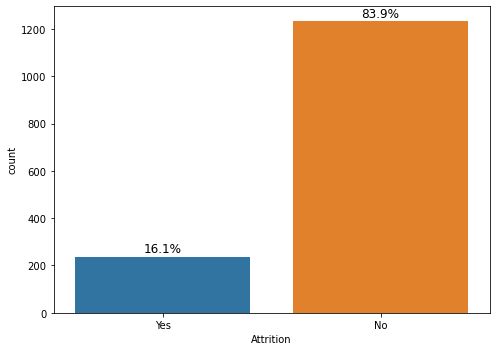

In [494]:
# the ratio of active employees and ex-employees
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=df["Attrition"])
add_percentages(ax)
plt.show()

## Age

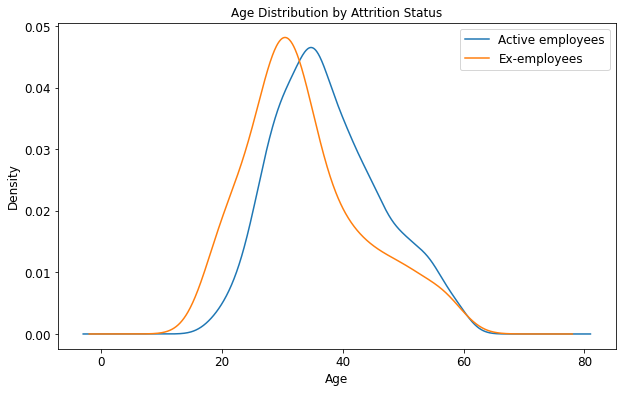

In [495]:
# age distribution 
df.groupby("Attrition")["Age"].plot(kind="kde", figsize=(10, 6), fontsize=12)
plt.legend(["Active employees", "Ex-employees"], fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution by Attrition Status", fontsize=12)
plt.show()

## Monthly Income

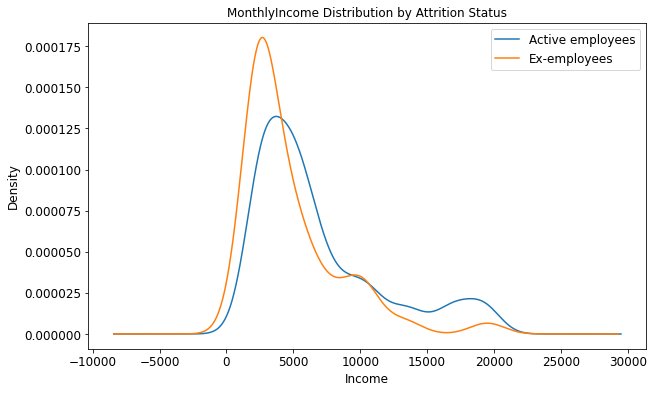

In [496]:
# Monthly Income distribution 
df.groupby("Attrition")["MonthlyIncome"].plot(kind="kde", figsize=(10, 6), fontsize=12)
plt.legend(["Active employees", "Ex-employees"], fontsize=12)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("MonthlyIncome Distribution by Attrition Status", fontsize=12)
plt.show()

## Gender

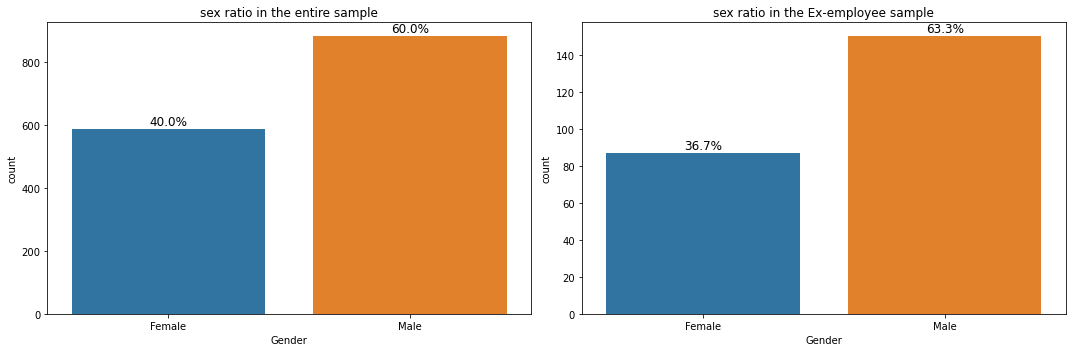

In [497]:
# sex ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=ax1, x=df["Gender"])
ax1.set_title("sex ratio in the entire sample")
add_percentages(ax1)

sns.countplot(ax=ax2, x=df[df["Attrition"] == "Yes"]["Gender"])
ax2.set_title("sex ratio in the Ex-employee sample")
add_percentages(ax2, df[df["Attrition"] == "Yes"])
plt.show()

Gender  Attrition
Female  No           85.204082
        Yes          14.795918
Male    No           82.993197
        Yes          17.006803
Name: Attrition, dtype: float64


[]

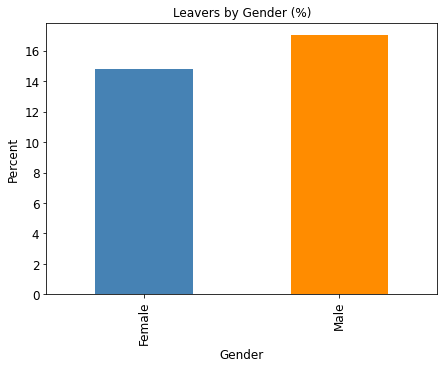

In [498]:
# percentage of active employees and ex-employees, depending on gender
df_gb_gender = df.groupby("Gender")["Attrition"].value_counts(normalize=True).apply(lambda x: x*100)
print(df_gb_gender)

# Gender distribution among Ex-employees
exempl_gb_gender = df_gb_gender[[1, 3]]
exempl_gb_gender.index = ["Female", "Male"]

exempl_gb_gender.plot(
    kind="bar", color=["steelblue", "darkorange"], figsize=(7, 5), fontsize=12
)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percent", fontsize=12)
plt.title("Leavers by Gender (%)", fontsize=12)

plt.plot()

## Marital status

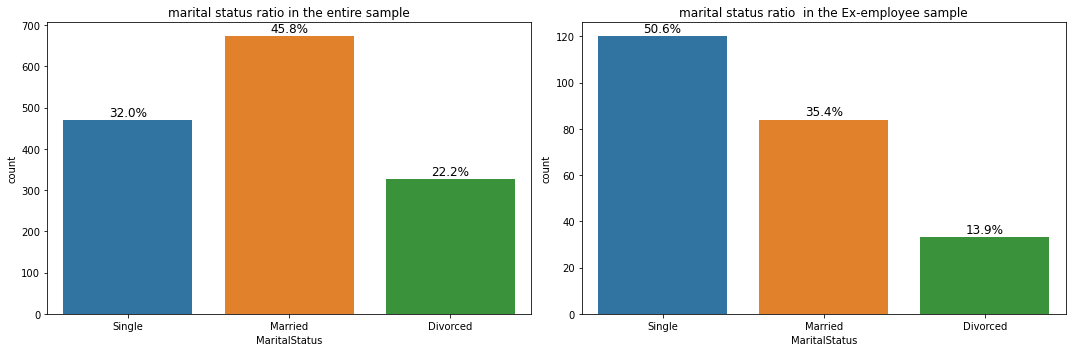

In [499]:
# marital status ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=ax1, x=df["MaritalStatus"])
ax1.set_title("marital status ratio in the entire sample")
add_percentages(ax1)

sns.countplot(ax=ax2, x=df[df["Attrition"] == "Yes"]["MaritalStatus"])
ax2.set_title("marital status ratio  in the Ex-employee sample")
add_percentages(ax2, df[df["Attrition"] == "Yes"])
plt.show()

MaritalStatus  Attrition
Divorced       No           89.908257
               Yes          10.091743
Married        No           87.518574
               Yes          12.481426
Single         No           74.468085
               Yes          25.531915
Name: Attrition, dtype: float64


[]

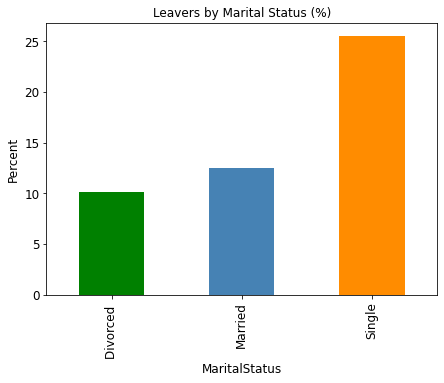

In [500]:
# percentage of active employees and ex-employees, depending on marital status
df_gb_mrstatus = df.groupby("MaritalStatus")["Attrition"].value_counts(normalize=True).apply(lambda x: x*100)
print(df_gb_mrstatus)

# distribution by MaritalStatus among Ex-employees
exempl_gb_mrstatus = df_gb_mrstatus[[1, 3, 5]]
exempl_gb_mrstatus.index = ["Divorced ", "Married", "Single"]

exempl_gb_mrstatus.plot(
    kind="bar", color=["green","steelblue", "darkorange"], figsize=(7, 5), fontsize=12
)
plt.xlabel("MaritalStatus", fontsize=12)
plt.ylabel("Percent", fontsize=12)
plt.title("Leavers by Marital Status (%)", fontsize=12)
plt.plot()

## Overtime

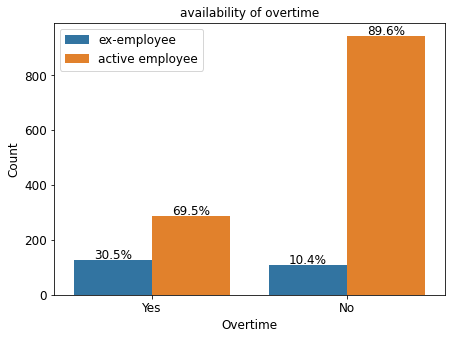

In [501]:
# number of employees with overtime
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=df["OverTime"], hue=df["Attrition"])
add_percentages_hue(ax)
plt.title("availability of overtime", fontsize=12)
plt.legend(["ex-employee", "active employee"],fontsize="large")
plt.xlabel("Overtime", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

OverTime  Attrition
No        No           89.563567
          Yes          10.436433
Yes       No           69.471154
          Yes          30.528846
Name: Attrition, dtype: float64


[]

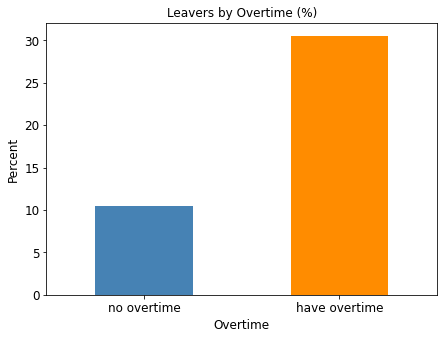

In [502]:
# percentage of active employees and ex-employees, depending on overtime
df_gb_overtime = df.groupby("OverTime")["Attrition"].value_counts(normalize=True).apply(lambda x: x*100)
print(df_gb_overtime)

# percentage of ex-employees, depending on overtime
exempl_gb_overtime = df_gb_overtime[[1, 3]]
exempl_gb_overtime.index = ["no overtime", "have overtime"]


exempl_gb_overtime.plot(
    kind="bar", color=["steelblue", "darkorange"], figsize=(7, 5), fontsize=12
)
plt.xlabel("Overtime", fontsize=12)
plt.ylabel("Percent", fontsize=12)
plt.title("Leavers by Overtime (%)", fontsize=12)
plt.xticks(rotation=0)
plt.plot()

## Job role

[]

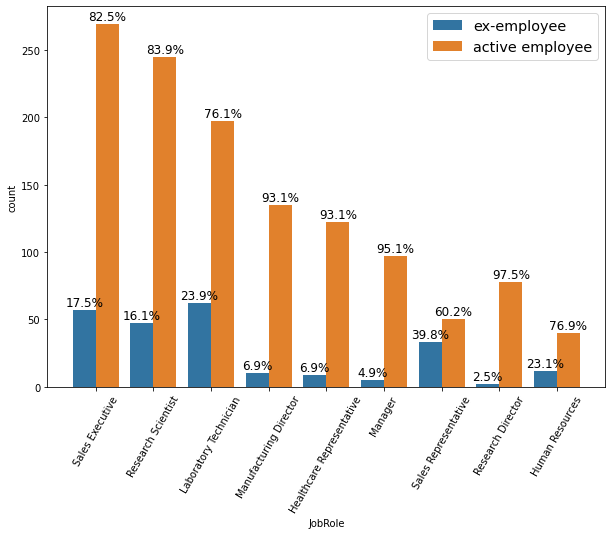

In [503]:
# job role ratio
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df["JobRole"], hue=df["Attrition"])
add_percentages_hue(ax)
plt.xticks(rotation=60)
plt.legend(["ex-employee", "active employee"],fontsize="x-large")
plt.plot()

In [504]:
# percentage of active employees and ex-employees, depending on job role
df.groupby("JobRole")["Attrition"].value_counts(normalize=True).apply(lambda x: x*100)

JobRole                    Attrition
Healthcare Representative  No           93.129771
                           Yes           6.870229
Human Resources            No           76.923077
                           Yes          23.076923
Laboratory Technician      No           76.061776
                           Yes          23.938224
Manager                    No           95.098039
                           Yes           4.901961
Manufacturing Director     No           93.103448
                           Yes           6.896552
Research Director          No           97.500000
                           Yes           2.500000
Research Scientist         No           83.904110
                           Yes          16.095890
Sales Executive            No           82.515337
                           Yes          17.484663
Sales Representative       No           60.240964
                           Yes          39.759036
Name: Attrition, dtype: float64

## Years in current role / company / since last promotion / with current manager

[]

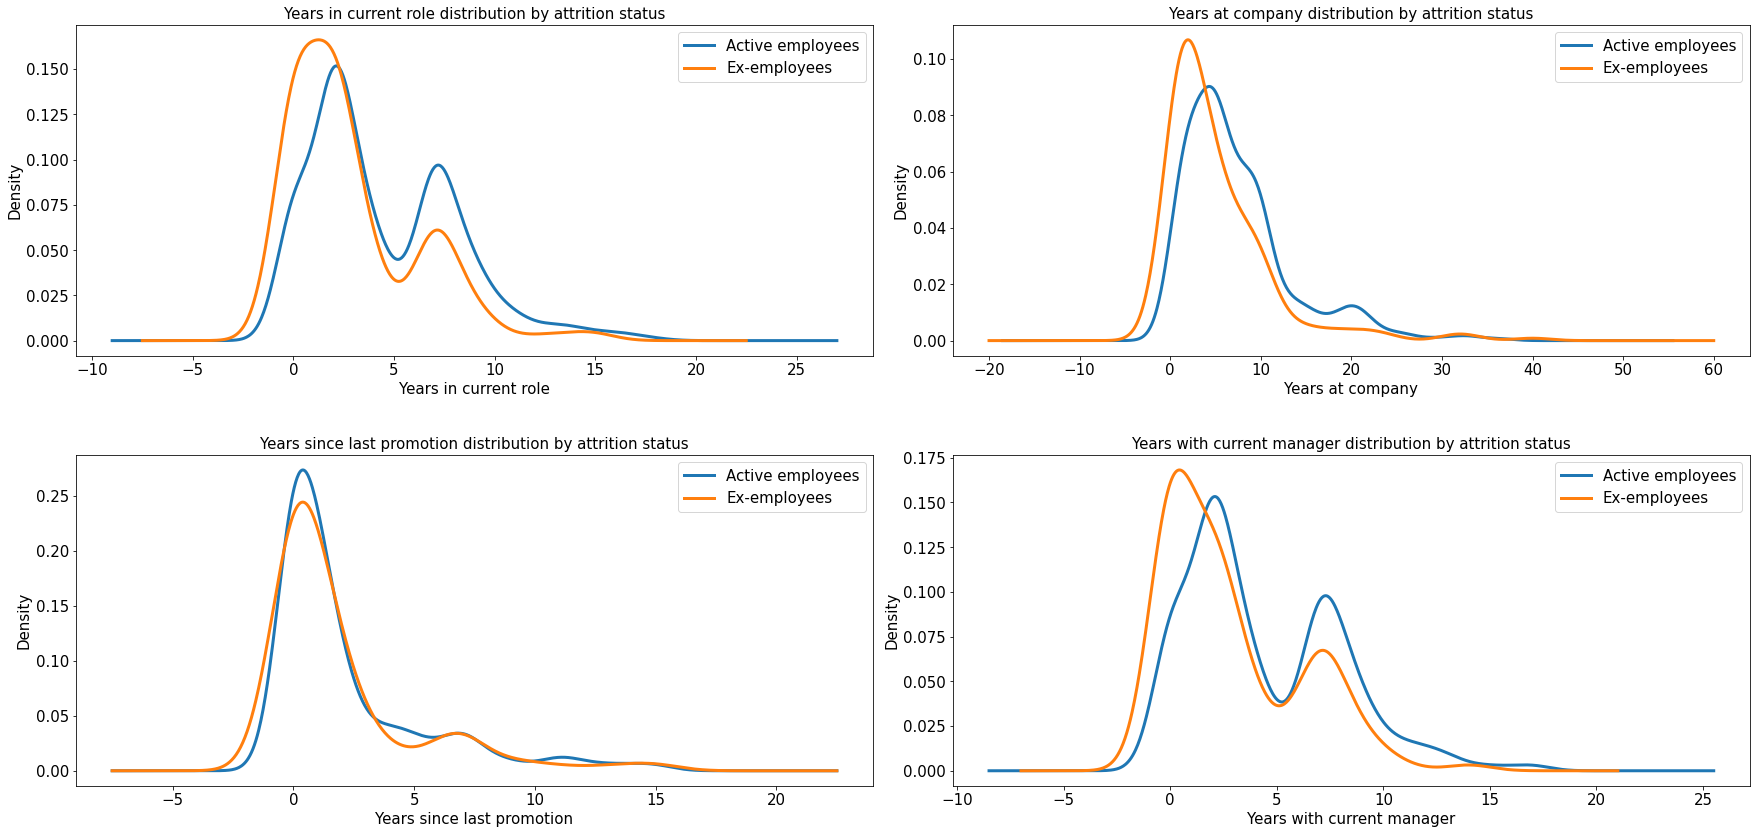

In [505]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(30, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.3) # distance between graphs

df.groupby("Attrition")["YearsInCurrentRole"].plot(ax=ax1, kind="kde", fontsize=15, linewidth=3)
ax1.set_title("Years in current role distribution by attrition status", fontsize=15)
ax1.legend(["Active employees", "Ex-employees"], fontsize=15)
ax1.set_xlabel("Years in current role", fontsize=15)
ax1.set_ylabel("Density", fontsize=15)

df.groupby("Attrition")["YearsAtCompany"].plot(ax=ax2, kind="kde", fontsize=15, linewidth=3)
ax2.set_title("Years at company distribution by attrition status", fontsize=15)
ax2.legend(["Active employees", "Ex-employees"], fontsize=15)
ax2.set_xlabel("Years at company", fontsize=15)
ax2.set_ylabel("Density", fontsize=15)

df.groupby("Attrition")["YearsSinceLastPromotion"].plot(ax=ax3, kind="kde", fontsize=15, linewidth=3)
ax3.set_title("Years since last promotion distribution by attrition status", fontsize=15)
ax3.legend(["Active employees", "Ex-employees"], fontsize=15)
ax3.set_xlabel("Years since last promotion", fontsize=15)
ax3.set_ylabel("Density", fontsize=15)

df.groupby("Attrition")["YearsWithCurrManager"].plot(ax=ax4, kind="kde", fontsize=15, linewidth=3)
ax4.set_title("Years with current manager distribution by attrition status", fontsize=15)
ax4.legend(["Active employees", "Ex-employees"], fontsize=15)
ax4.set_xlabel("Years with current manager", fontsize=15)
ax4.set_ylabel("Density", fontsize=15)
plt.plot()

## WorkLifeBalance

[]

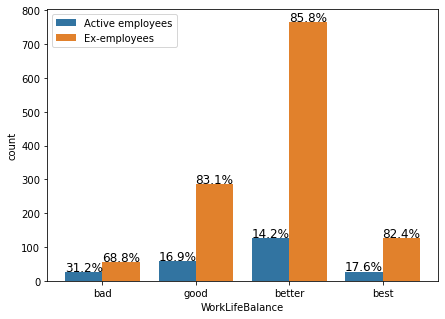

In [506]:
# 
labels = ["bad", "good", "better", "best"]

plt.figure(figsize=(7, 5))
ax = sns.countplot(x=df["WorkLifeBalance"], hue=df["Attrition"])
ax.set_xticklabels(labels=labels)
ax.legend(["Active employees", "Ex-employees"], fontsize=10)
add_percentages_hue(ax)
plt.plot()

In [507]:
# percentage of active employees and ex-employees, depending on job role
df.groupby("WorkLifeBalance")["Attrition"].value_counts(normalize=True).apply(lambda x: x*100)

WorkLifeBalance  Attrition
1                No           68.750000
                 Yes          31.250000
2                No           83.139535
                 Yes          16.860465
3                No           85.778275
                 Yes          14.221725
4                No           82.352941
                 Yes          17.647059
Name: Attrition, dtype: float64

## BusinessTravel

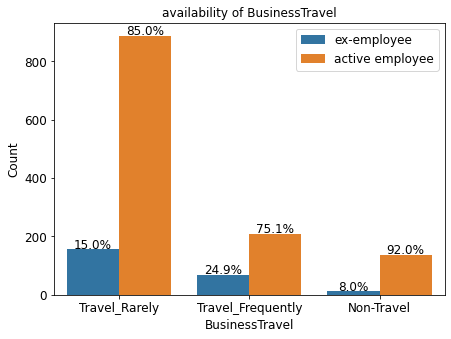

In [508]:
# number of employees with BusinessTravel
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=df["BusinessTravel"], hue=df["Attrition"])
plt.title("availability of BusinessTravel", fontsize=12)
plt.legend(["ex-employee", "active employee"],fontsize="large")
plt.xlabel("BusinessTravel", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
add_percentages_hue(ax)
plt.show()

# Correlation map

In [509]:
df.select_dtypes("object").columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [510]:
# drop object columns
df_corr = df.drop(df.select_dtypes("object").columns, axis=1)

In [511]:
# encoding target variable
df_corr["Target"] = df["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)

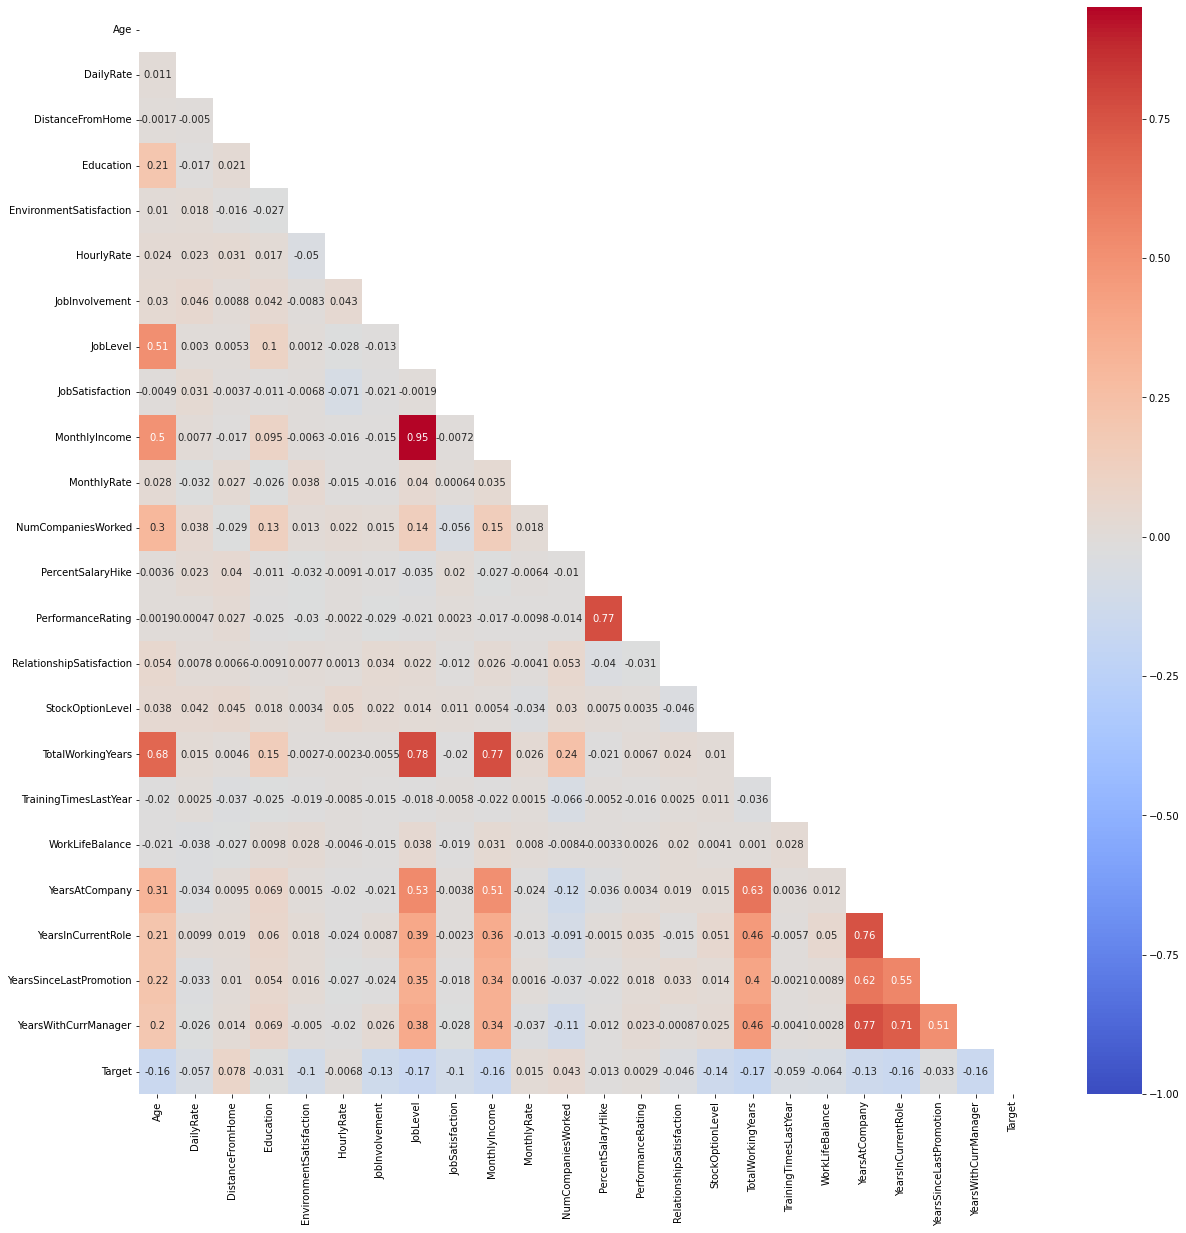

In [512]:
# building corr map
corr_matrix = np.triu(df_corr.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr.corr(), cmap="coolwarm", mask=corr_matrix, vmin=-1, annot=True)
plt.show()

В датасете имеется несколько сильнокоррелированных предикторов:
1. Группа предикторов YearsAtCompany, YearsInCurrentRole,YearsSinceLastPromotion, YearsWithCurrManager имеют довольно сильные корреляции между собой (0.51-0.77).
2. С вышеуказанной группой предикторов значимую корреляцию имеют следующие предикторы TotalWorkingYears (0.4-0.46), MonthlyIncome(0.34-0.51), JobLevel(0.35-0.53).
3. Наибольший коэфф. корреляции имеет пара MonthlyIncome-JobLevel(0.95).
4. TotalWorkingYears сильно коррелирует с Age(0.68), JobLevel(0.78), MonthlyIncome(0.77).
5. Age коррелирует с MonthlyIncome(0.5), JobLevel(0.51).
6. Целевая переменная не имеет силько коррелированных предикторов.

# PCA

Величина эффекта мультиколлиниарности зависит от задачи моделирования. Если целью моделирования является прогнозирование значений зависимой переменной, то  присутствие мультиколлинеарности не сильно сказывается на прогнозных качествах модели. Если же важно определение вклада каждого фактора в изменение зависимой переменной, то наличие мультиколлинеарности может стать проблемой.

При построении модели логистической регрессии эффект мультиколлиниарности дополнительно будет снижен применением регуляризации.

Тем не менее опыты показали, что устранение коррелированных предикторов методом главных компонент позволяет улучшить модели, хоть и незначительно.

Было выделено две логические группы предикторов, которые связанны между собой как и логической частью, так и высокой мультиколлинеарность:
1. Первая группа так или иначе связана с временем работы. В нее вошли YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.
2. Вторая группа завязана на скилы сотрудника (или их некое выражение, например, чем лучше скилы сотрудника тем выше его доход). В эту группу вошли JobLevel, PerformanceRating, MonthlyIncome, TotalWorkingYears.

Каждая из групп заменена на новую переменную.

In [513]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

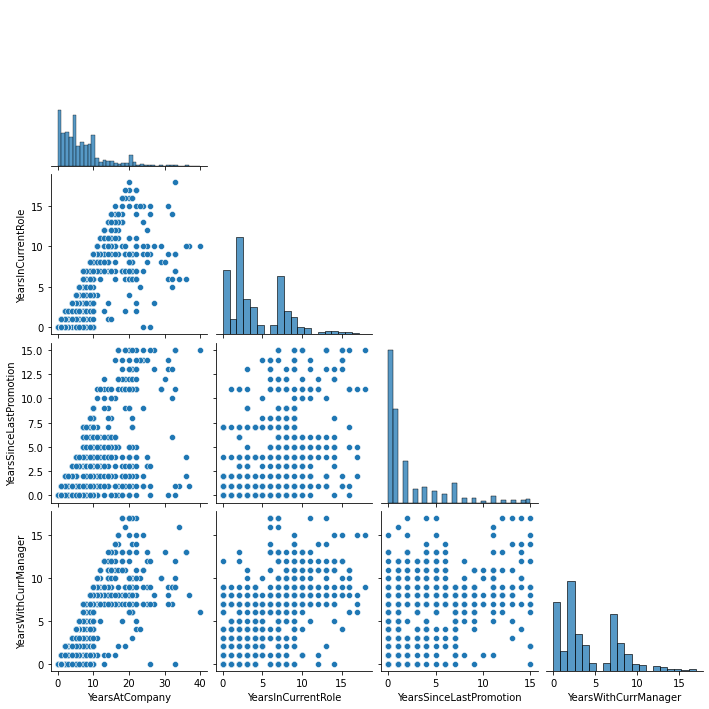

In [514]:
# columns for dimension reduction
year_columns = [
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
]

# paired distributions of predictors
sns.pairplot(df[year_columns], corner=True)
plt.show()

In [515]:
# PCA for dimensionality reduction
pca = PCA(n_components=1)
years_comp = pca.fit(df[year_columns])
print(
    "The percentage of deviation explained by the received component (%): ",
    round(years_comp.explained_variance_ratio_.sum()*100, 1),
)
years_comp = years_comp.transform(df[year_columns])

# adding the received variable to the dataset
df["years_component"] = years_comp

# deleting the original columns
df = df.drop(year_columns, axis=1)

The percentage of deviation explained by the received component (%):  80.6


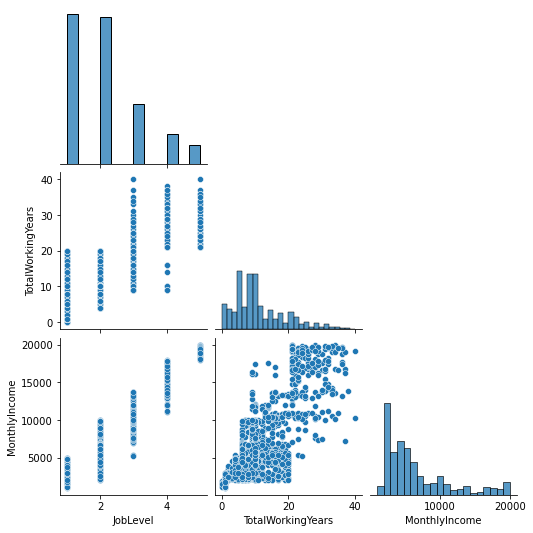

In [516]:
# columns for dimension reduction
jobskils_columns = [
    "JobLevel",
    "TotalWorkingYears",
    "MonthlyIncome",
]

# paired distributions of predictors
sns.pairplot(df[jobskils_columns], corner=True)
plt.show()

In [517]:
# PCA for dimensionality reduction
pca = PCA(n_components=1)
jobskils_comp = pca.fit(df[jobskils_columns])
print(
    "The percentage of deviation explained by the received component (%): ",
    round(jobskils_comp.explained_variance_ratio_.sum()*100, 1),
)
jobskils_comp = jobskils_comp.transform(df[jobskils_columns])

# adding the received variable to the dataset
df["jobskils_comp"] = jobskils_comp

# deleting the original columns
df = df.drop(jobskils_columns, axis=1)

The percentage of deviation explained by the received component (%):  100.0


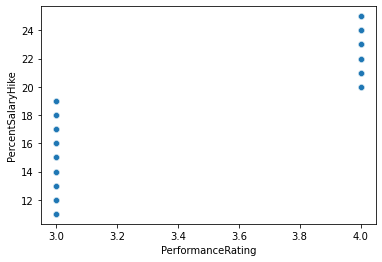

In [518]:
# paired distributions of predictors
sns.scatterplot(x=df["PerformanceRating"], y=df["PercentSalaryHike"])
plt.show()

In [519]:
# PCA for dimensionality reduction
pca = PCA(n_components=1)
perfomance_comp = pca.fit(df[["PerformanceRating", "PercentSalaryHike"]])
print(
    "The percentage of deviation explained by the received component (%): ",
    round(perfomance_comp.explained_variance_ratio_.sum()*100, 1),
)
perfomance_comp = perfomance_comp.transform(df[["PerformanceRating", "PercentSalaryHike"]])

# adding the received variable to the dataset
df["perfomance_comp"] = perfomance_comp

# deleting the original columns
df = df.drop(["PerformanceRating", "PercentSalaryHike"], axis=1)

The percentage of deviation explained by the received component (%):  99.6


In [520]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'years_component', 'jobskils_comp', 'perfomance_comp'],
      dtype='object')

## Correlation map after PCA

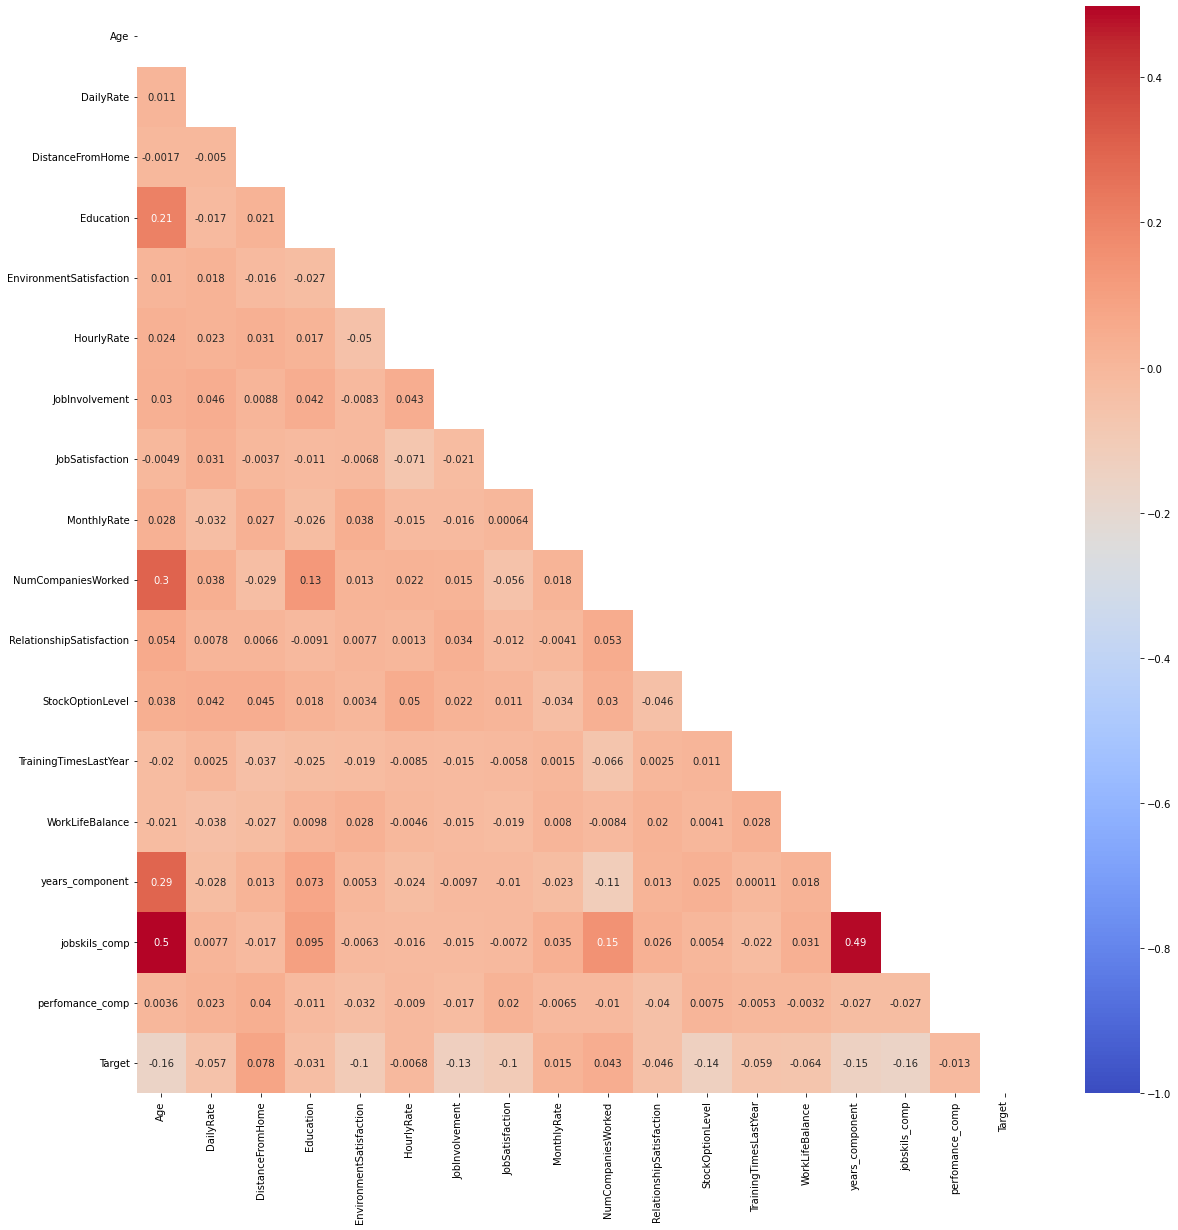

In [521]:
# drop object columns
df_corr_pca = df.drop(df.select_dtypes("object").columns, axis=1)

# encoding target variable
df_corr_pca["Target"] = df["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)

# building corr map
corr_matrix_pca = np.triu(df_corr_pca.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr_pca.corr(), cmap="coolwarm", mask=corr_matrix_pca, vmin=-1, annot=True)
plt.show()

# Encoding

In [522]:
df.shape

(1470, 25)

In [523]:
# Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
le_columns = []
for col in df.columns:
    if df[col].dtype == "object" and df[col].nunique() <= 2:
        df[col] = le.fit_transform(df[col])
        le_count += 1
        le_columns.append(col)
print("number of encoded columns: ", le_count)
print("encoded columns: ", le_columns)

number of encoded columns:  3
encoded columns:  ['Attrition', 'Gender', 'OverTime']


In [524]:
# columns with the object type
df.select_dtypes(include=['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [525]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df, drop_first=True)

In [526]:
df.shape

(1470, 39)

In [527]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,2,...,0,1,0,0,0,0,0,0,1,0


## Scaling

In [528]:
# Transform features by scaling each feature to range [0, 1]
scaler = MinMaxScaler()
for column in df.columns:
    df[column] = scaler.fit_transform(df[[column]])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1.0,0.715820,0.000000,0.25,0.333333,0.0,0.914286,0.666667,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.666667,1.0,0.442857,0.333333,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,1.000000,1.0,0.885714,0.333333,0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,1.000000,0.0,0.371429,0.666667,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.000000,1.0,0.142857,0.666667,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Splitting 

In [529]:
# dataframe with target variable only
target = df["Attrition"].copy()

# deleting a target variable
df = df.drop(["Attrition"], axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(df, target, 
                                                    test_size=0.25, 
                                                    random_state=42, 
                                                    stratify=target)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1102, 38)
X_test shape:  (368, 38)
y_train shape:  (1102,)
y_test shape:  (368,)


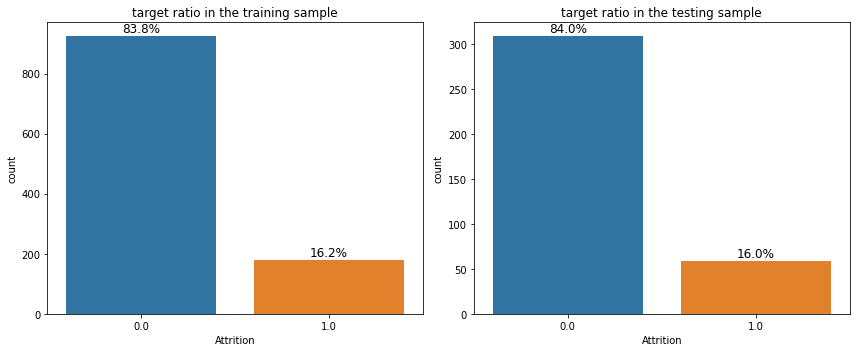

In [530]:
# target ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(ax=ax1, x=y_train)
ax1.set_title("target ratio in the training sample")
add_percentages(ax1, y_train)

sns.countplot(ax=ax2, x=y_test)
ax2.set_title("target ratio in the testing sample")
add_percentages(ax2, y_test)
plt.show()

# Neighbourhood Cleaning Rule

Исходя из тестов, стратегия очищения данных от шума данным методом смогла повысить качество классификации, но не существенно. Передискретизация (SMOTE, ADASYN) не дала положительного эффекта.

In [531]:
# undersampling the training set
ncr = NeighbourhoodCleaningRule()
X_train, y_train = ncr.fit_resample(X_train, y_train)

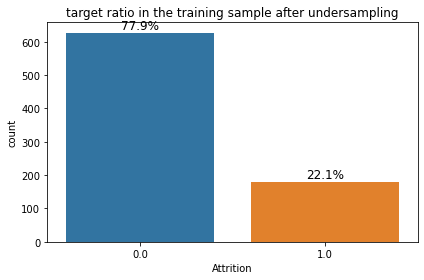

In [532]:
# target ratio after undersampling
ax = sns.countplot(x=y_train)
ax.set_title("target ratio in the training sample after undersampling")
add_percentages(ax, y_train)

# Building models

Обучим несколько базовых алгоритмов и выберем несколько лучших для дальнейшей оптимизации. В качестве основной метрики испоьзуем roc_auc

In [533]:
# selection of algorithms
models = []
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", 
                                                         class_weight="balanced", 
                                                         random_state=42)))
models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)))
models.append(("SVM", SVC(random_state=42)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=42)))
models.append(("Gaussian NB", GaussianNB()))

In [534]:
# evaluation of each model by cross-validation
basemodel_result = pd.DataFrame(columns=["Model", "ROC AUC mean %", "ROC AUC std %"])
cv_results = pd.DataFrame()
i = 0
for name, model in models:
    cv = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc")
    cv_results[name] = cv
    basemodel_result.loc[i] = [
        name,
        round(cv.mean() * 100, 2),
        round(cv.std() * 100, 2),
    ]
    i += 1

basemodel_result

,Model,ROC AUC mean %,ROC AUC std %
0,Logistic Regression,85.82,3.78
1,Random Forest,86.45,4.73
2,SVM,87.35,3.11
3,KNN,81.50,5.48
4,Decision Tree,67.44,4.81
5,Gaussian NB,79.88,4.50


In [535]:
# results of 10-fold cross-validation for each model
cv_results

,Logistic Regression,Random Forest,SVM,KNN,Decision Tree,Gaussian NB
0,0.883598,0.905203,0.927690,0.859347,0.694444,0.828042
1,0.858025,0.896384,0.879189,0.809083,0.682540,0.809524
2,0.879189,0.840388,0.869489,0.787919,0.559524,0.835979
3,0.756614,0.835979,0.802469,0.748236,0.666667,0.683422
4,0.841270,0.777337,0.850088,0.791005,0.650794,0.800705
5,0.887021,0.898693,0.884220,0.841737,0.760037,0.815126
6,0.868347,0.894024,0.887021,0.908964,0.698880,0.806723
7,0.853047,0.853943,0.868280,0.711470,0.689068,0.776882
8,0.898746,0.936380,0.900538,0.837814,0.689068,0.855735
9,0.856631,0.806452,0.865591,0.853943,0.653226,0.775986


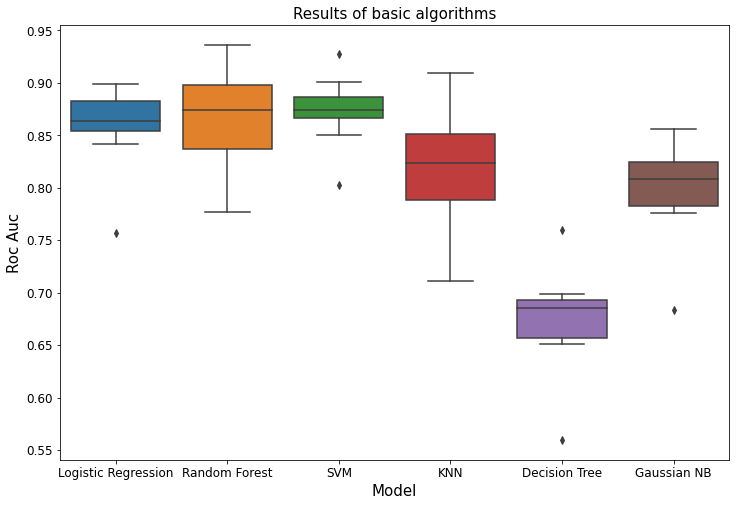

In [536]:
# visualization of model performance
plt.figure(figsize=(12, 8))
sns.boxplot(data=cv_results)
plt.title("Results of basic algorithms", fontsize=15)
plt.ylabel("Roc Auc", fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Наилучшие результаты показали модели логистической регрессии, случайного леса и  метод опорных векторов. Именно эти модели будут выбраны для дальнейшего улучшения.

# Logistic Regression

In [537]:
# tuning model hyperparameters using grid search
model_lr = LogisticRegression(class_weight="balanced", solver="liblinear")
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
params_lr = {"C": np.arange(0.01, 10, 0.1), "penalty": ["l1", "l2"]}
grid_lr = GridSearchCV(
    estimator=model_lr,
    param_grid=params_lr,
    cv=folds,
    scoring="roc_auc",
    return_train_score=True,
    n_jobs=4,
)

grid_lr.fit(X_train, y_train)
best_estimator_lr = grid_lr.best_estimator_    #optimized Logistics Regression
results_lr = grid_lr.cv_results_

print("=" * 60 + "\n")
print("Best estimator: ", grid_lr.best_estimator_)
print("Best parameters: ", grid_lr.best_params_)
print("Best roc_auc score on training dataset: ", grid_lr.best_score_)
print("=" * 60 + "\n")


Best estimator:  LogisticRegression(C=7.21, class_weight='balanced', solver='liblinear')
Best parameters:  {'C': 7.21, 'penalty': 'l2'}
Best roc_auc score on training dataset:  0.8634503144148938



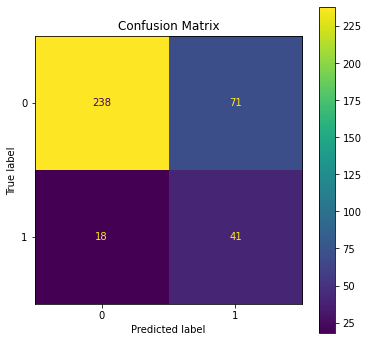

In [538]:
# predicting values on a test dataset
y_pred_lr = best_estimator_lr.predict(X_test)
y_pred_proba_lr = best_estimator_lr.predict_proba(X_test)

# build a confusion matrix
matrix = confusion_matrix(y_test, y_pred_lr)
cmp = ConfusionMatrixDisplay(confusion_matrix=matrix)

fig, ax = plt.subplots(figsize=(6, 6))
cmp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [539]:
# classification report
report = classification_report(y_test, y_pred_lr)
print(report)

# roc_auc score of an optimized model on a test dataset
print("=" * 60 + "\n")
print("roc_auc score on test dataset: ", roc_auc_score(y_test, y_pred_proba_lr[:, 1]))  # we used probabilities associated with the employee leaving

              precision    recall  f1-score   support

         0.0       0.93      0.77      0.84       309
         1.0       0.37      0.69      0.48        59

    accuracy                           0.76       368
   macro avg       0.65      0.73      0.66       368
weighted avg       0.84      0.76      0.78       368


roc_auc score on test dataset:  0.8034117711590149


Данная модель способна с высокой точностью правильно классифицировать большинство активных сотрудников, т.е. тех кто уволится в наименьшей вероятностью. Тем не менее правильная классификация сотрудников с меткой 1 (те что уволятся с большой вероятностью) является приорететной для компании. Модель способна выявить большую часть таких сотрудников (примерно 69%), однако будет совершать большое количество ложно положительных ошибок. Однако стоит заметить, что ложноположительные ошибки несут меньше вреда компании чем ложно отрицательные.

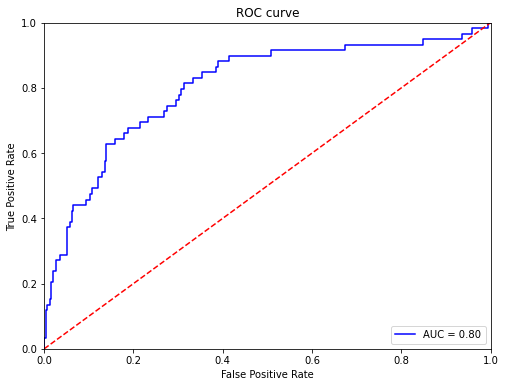

In [540]:
# plotting ROC graph
probs = best_estimator_lr.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title("ROC curve")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [541]:
# dataframe with weights of predictors of logistic regression
df_lr_coeff = pd.DataFrame(columns=["predictor", "coeff"])
df_lr_coeff["predictor"] = X_train.columns
df_lr_coeff["coeff"] = best_estimator_lr.coef_[0]
df_lr_coeff.sort_values("coeff", ascending=False, inplace=True)
df_lr_coeff.head()

,predictor,coeff
35,JobRole_Sales Representative,2.619648
28,JobRole_Human Resources,2.472277
29,JobRole_Laboratory Technician,2.383945
19,BusinessTravel_Travel_Frequently,1.832312
11,OverTime,1.806453


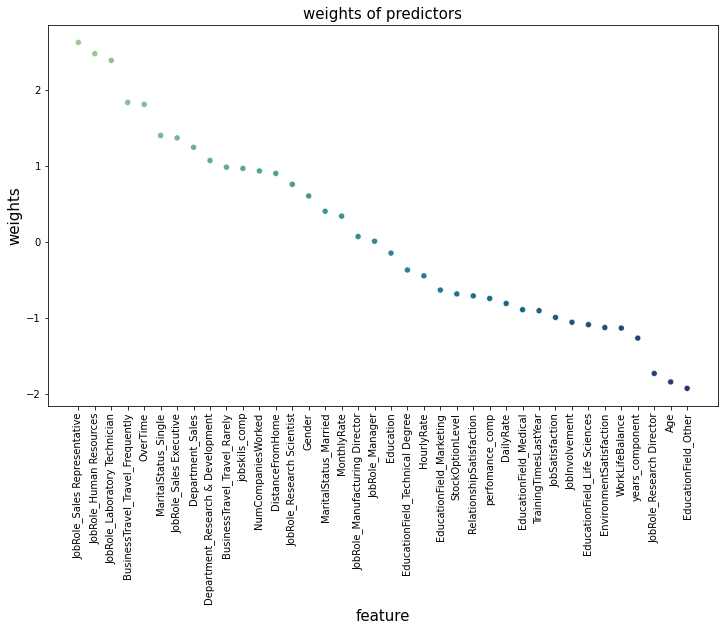

In [542]:
# plotting the weights of the model
plt.figure(figsize=(12, 7))
sns.scatterplot(x="predictor", y="coeff", data=df_lr_coeff, hue="predictor", legend=False, palette="crest")
plt.title("weights of predictors", fontsize=15)
plt.ylabel("weights", fontsize=15)
plt.xlabel("feature", fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Random Forest

In [543]:
# tuning model hyperparameters using grid search
model_rf = RandomForestClassifier(class_weight="balanced", random_state=40)
params_rf = {
    "n_estimators": [100, 150],
    "min_samples_split": [2, 4, 8, 10, 12],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_depth": [5, 10, 15, 20, 25],
}
grid_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=params_rf,
    cv=folds,
    scoring="roc_auc",
    n_jobs=4,
    return_train_score=True,
)

grid_rf.fit(X_train, y_train)
best_estimator_rf = grid_rf.best_estimator_

print("=" * 60 + "\n")
print("Best estimator: ", best_estimator_rf)
print("Best parameters: ", grid_rf.best_params_)
print("Best roc_auc score on training dataset: ", grid_rf.best_score_)
print("=" * 60 + "\n")


Best estimator:  RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=150,
                       random_state=40)
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best roc_auc score on training dataset:  0.8608867621122525



In [544]:
# predicting values on a test dataset
y_pred_rf = best_estimator_rf.predict(X_test)
y_pred_rf_proba = best_estimator_rf.predict_proba(X_test)

# classification report
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

# roc_auc score of an optimized model on a test dataset
print("=" * 60 + "\n")
print("roc_auc score in test sample: ", roc_auc_score(y_test, y_pred_rf_proba[:,1]))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92       309
         1.0       0.60      0.20      0.30        59

    accuracy                           0.85       368
   macro avg       0.73      0.59      0.61       368
weighted avg       0.82      0.85      0.82       368


roc_auc score in test sample:  0.7684164335472546


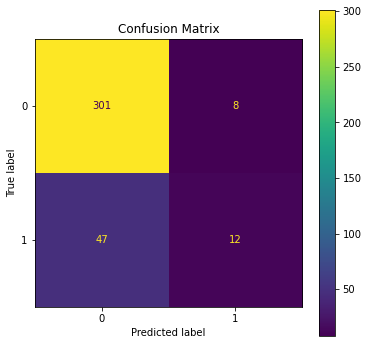

In [545]:
# build a confusion matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cmp_rf = ConfusionMatrixDisplay(confusion_matrix=matrix_rf)

fig, ax = plt.subplots(figsize=(6, 6))
cmp_rf.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

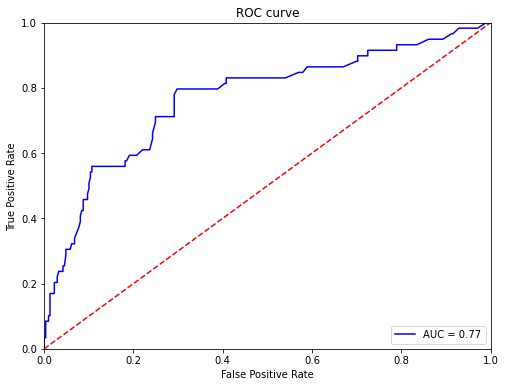

In [546]:
# plotting ROC graph
preds_rf = y_pred_rf_proba[:, 1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, preds_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.title("ROC curve")
plt.plot(fpr_rf, tpr_rf, "b", label="AUC = %0.2f" % roc_auc_rf)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [547]:
# rating of the importance of features
feature_importance = best_estimator_rf.feature_importances_
indexes = np.argsort(feature_importance)[::-1]
df_feature_coeff = pd.DataFrame(columns=["feature", "importance coeff"])
for i, index in enumerate(indexes):
    feature = X_train.columns[index]
    coeff = feature_importance[index]
    df_feature_coeff.loc[i] = (feature, coeff)
    
df_feature_coeff.sort_values("importance coeff", ascending=False, inplace=True)
df_feature_coeff.head()

,feature,importance coeff
0,jobskils_comp,0.103593
1,Age,0.083235
2,years_component,0.082328
3,OverTime,0.055625
4,DailyRate,0.054777


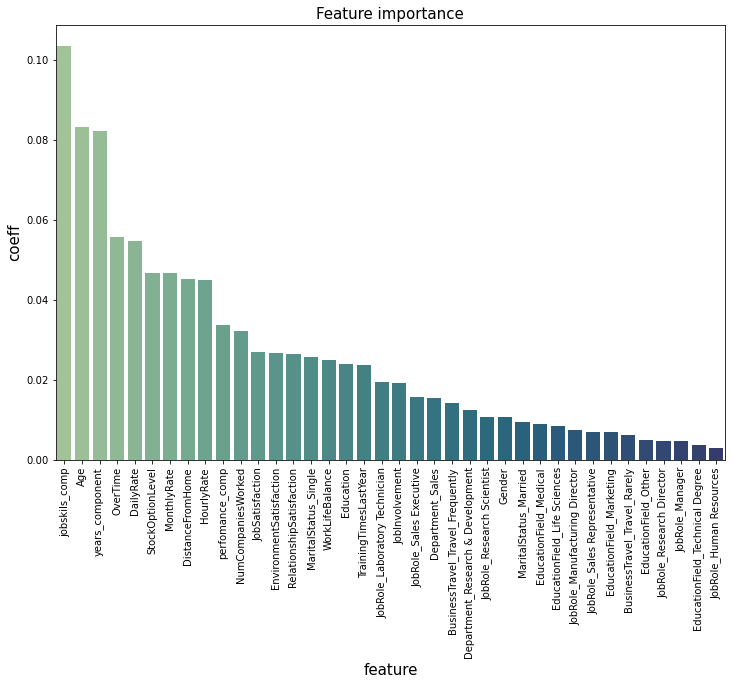

In [548]:
# drawing a barplot with an assessment of the importance of features
plt.figure(figsize=(12, 8))
sns.barplot(data = df_feature_coeff, x="feature", y="importance coeff", palette="crest")
plt.title("Feature importance", fontsize=15)
plt.ylabel("coeff", fontsize=15)
plt.xlabel("feature", fontsize=15)
plt.xticks(rotation=90)
plt.show()

Модель случайного леса пердсказывает уход сотрудника хуже логистической регрессии. Такая модель имеет низкий recall для класса меньшинства (ушедшие работники).

Random Forest позволяет нам узнать, какие признаки наиболее важны для прогнозирования целевой переменной. Выше представлена диаграмма с признаками, отсортированными по их важности в порядке убывания. Следует учитывать, что некоторые предикторы были заменены с помощью PCA новыми несуществующими в рельности переременными. Если престроить диаграмму на исходных данных, ее вид изменится незначительно. Например, самой важной переменной на текущей диаграмме является jobskils_comp, которая полученна на оновании следующих исходных переменных YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager. При перестройке диаграммы все эти исходные переменные будут в топ 10 по важности. 

Понимание силы важности предикторов может сыграть ключенвую роль в разработке системы удержания сотрудников. Можно выделить следующие факторы, наиболее влияющие на уход сотрудника (моделирование без PCA, но метрики получаются чуть ниже):
1. Месячный доход. Люди с более высокой ЗП реже уходят из компании. Анализ рынка зарплат, их пересмотр и различные премии могут снизить вероятность ухода сотрудников.
2. Возраст и стаж. Чаще уходят более молодые сотрудники (мода = 30 лет). Поддержка молодых сотрудников и создание у сотрудников четкого видиния продвижения по службе улучшат отношение к компании. Сюда также можно отнести финансовую поддержку молодых сотрудников, различные социальные и спортивные мероприятия.
3. Переработки. Люди, которые работают сверхурочно, чаще уходят из компании. 
4. Количество лет в компании и с текущим менеджером. Чаще всего уходят сотрудники, проработавшние в компании меньше двух лет. Удовлетворенность начальством при этом будет играть большую роль, поэтому стоит проанализировать работу непосредственных начальников, у которых часто увольняются сотрудники.
5. Расстояние от дома. Сотрудники живущие далеко, покинут компанию с большей вероятностью. Соответственно компании следует оказывать помощь в переезде, или компенсировать расходы на дорогу.

# SVM

Результаты метода опорных векторов схожи с результатами логистической регрессии.